# Finding Average Score Difference

In [1]:
import ipywidgets as widgets

-------

In [2]:
from file_parser import FileParser

In [3]:
filename = "example_board/8queen.txt"

In [4]:
parsed_file = FileParser.parse_data(filename)

----------------

In [5]:
from chess_board import ChessBoard

In [6]:
from solver.simulated_annealing import SimulatedAnnealing
from solver.threshold_generator import BoltzmannGenerator

In [7]:
from chess_player import ChessPlayer

In [8]:
chess_board = ChessBoard.load_board(parsed_file)

## Panel

In [9]:
default_initial_temperature = 15
default_ratio = 1.0006
default_max_iter = 100000

------

In [10]:
threshold_generator = BoltzmannGenerator(default_initial_temperature, default_ratio)
solver = SimulatedAnnealing(chess_board, threshold_generator)

In [11]:
player = ChessPlayer(chess_board, solver)

In [12]:
score = []

progress_bar = widgets.IntProgress(min=0, max=default_max_iter)
display(progress_bar)

for i in range(0, default_max_iter):
    score_diff = player.solve(1)
    score.append((i, player.solver.current_score, score_diff))
    progress_bar.value += 1
    

IntProgress(value=0, max=100000)

In [13]:
print(player.chess_board)

....Q...
.......Q
...Q....
Q.......
..Q.....
.....Q..
.Q......
......Q.



--------

In [14]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()

In [15]:
df = pd.DataFrame(score, columns=["iteration", "score", "score_diff"])

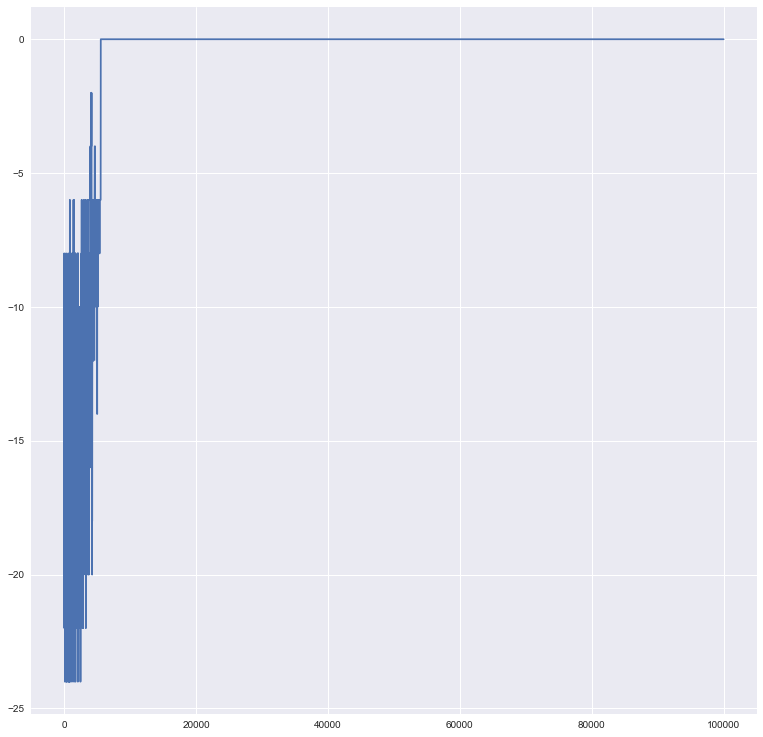

In [16]:
plt.figure(figsize=(13, 13))
plt.plot(df["score"]);

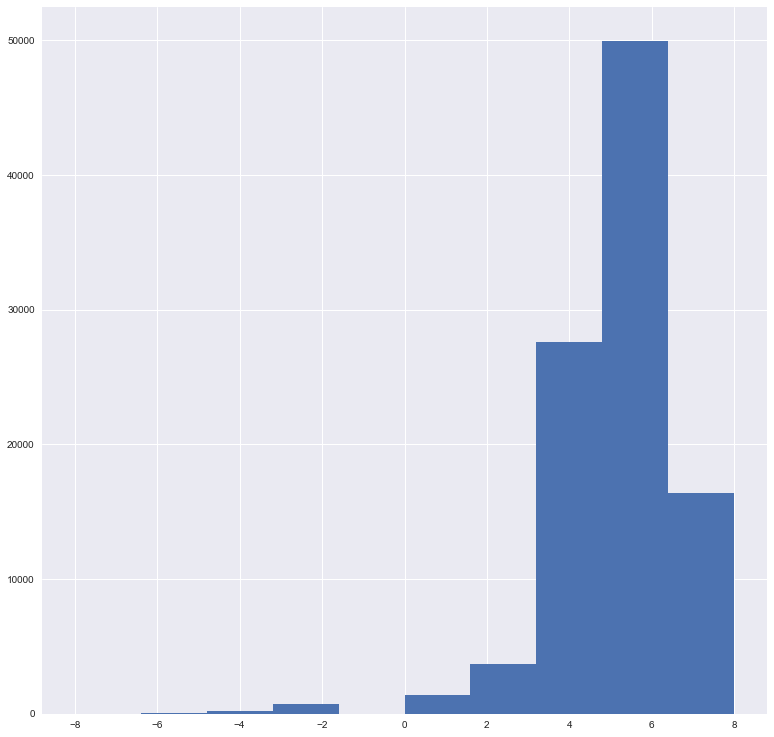

In [17]:
plt.figure(figsize=(13, 13))
plt.hist(df["score_diff"]);